**Proyek Analisis Data: Air Quality Dataset (Data Dingling)**

**Nama: Nahwan Al Hirzi**

**Email: m120b4ky3226@bangkit.academy**

**ID Dicoding: nahwan12**

**Menentukan Pertanyaan Bisnis**

- Bagaimana pola harian tingkat karbon monoksida (CO)?
- Bagaimana hubungan antara TEMP (temperatur) dan tingkat PM2.5/PM10?
- Bagaimana tren kualitas udara (PM2.5, PM10, SO2, CO, O3) berubah selama musim-musim berbeda dalam setahun? Apakah ada pola musiman yang dapat diidentifikasi?

**Import Semua Packages/Library yang Digunakan**

In [1]:
!pip install numpy pandas matplotlib seaborn scipy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Wrangling**

Data wrangling merupakan sebuah proses atau kumpulan kegiatan yang meliputi pengumpulan data (Gathering data), penilaian data (Assessing data), serta pembersihan data (Cleaning data) sebelum data digunakan dalam proses analisis data

*Gathering data*

In [3]:
df = pd.read_csv("/content/PRSA_Data_Dingling_20130301-20170228.csv", index_col="No") #Ganti dataset sesuai dengan yang saya beri
df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
No,,,,,,,,,,,,,,,,,
1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


*Assesing data*

*Duplicate data*

In [4]:
df.duplicated().sum()

0

*Info data*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 1 to 35064
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     35064 non-null  int64  
 1   month    35064 non-null  int64  
 2   day      35064 non-null  int64  
 3   hour     35064 non-null  int64  
 4   PM2.5    34285 non-null  float64
 5   PM10     34408 non-null  float64
 6   SO2      34334 non-null  float64
 7   NO2      33830 non-null  float64
 8   CO       33052 non-null  float64
 9   O3       33850 non-null  float64
 10  TEMP     35011 non-null  float64
 11  PRES     35014 non-null  float64
 12  DEWP     35011 non-null  float64
 13  RAIN     35013 non-null  float64
 14  wd       34924 non-null  object 
 15  WSPM     35021 non-null  float64
 16  station  35064 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 4.8+ MB


*Missing value*

In [6]:
df.isnull().sum()

,0
year,0
month,0
day,0
hour,0
PM2.5,779
PM10,656
SO2,730
NO2,1234
CO,2012
O3,1214


In [7]:
779+656+730+1234+2012+1214+53+50+53+51+14

6846

In [8]:
7015/35064

0.20006274241387179

*deskripsi data*




In [9]:
df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


*Outlier*

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

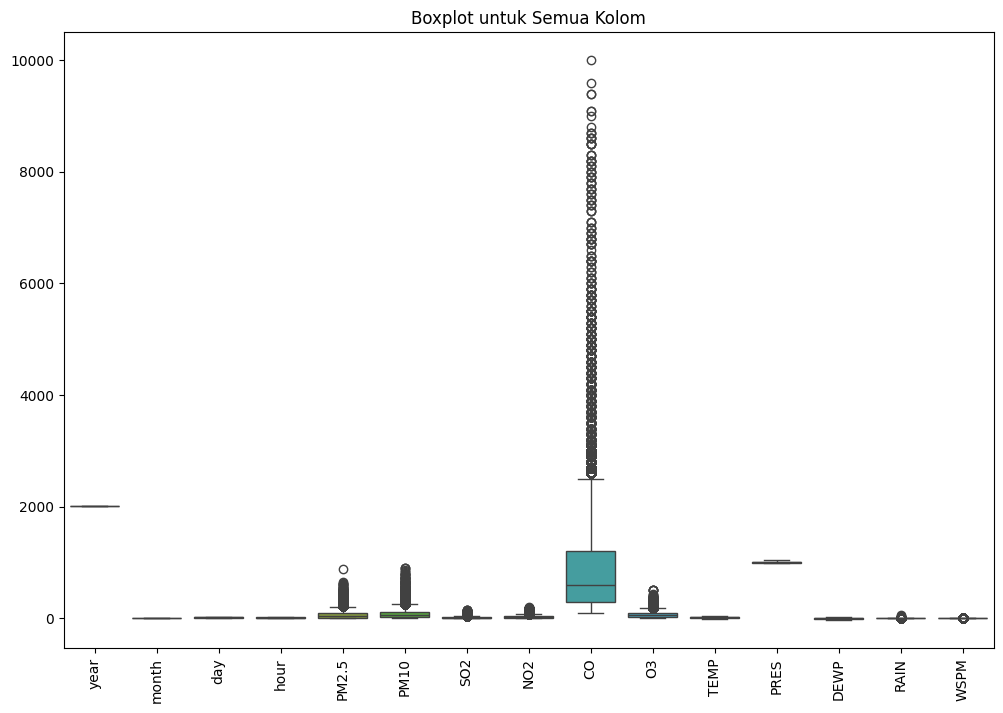

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot untuk Semua Kolom")
plt.show()

Frekuensi feature wd dalam dataset sebagi data kategorik

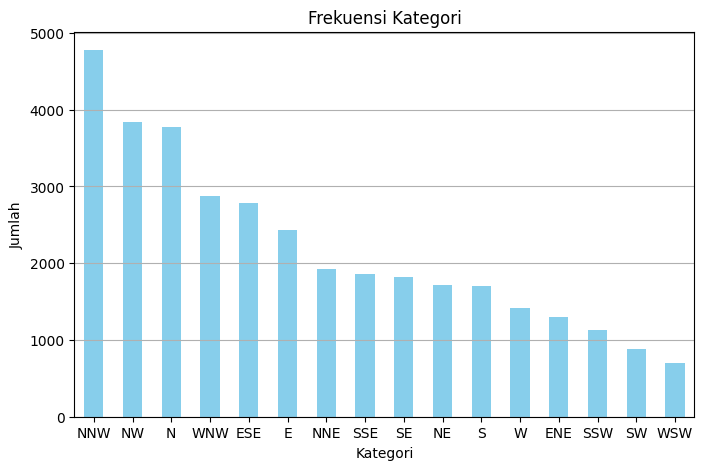

In [11]:
category_counts = df['wd'].value_counts()


plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Frekuensi Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Insight:
- Tidak terdapat data duplicate
- Terdapat 17 feature dalam dataset yang mana memiliki beragam type data, yaitu int, float, dan object. Selain itu, juga terdapat 35064 data dalam dataset tersebut
- Terdapat 6846 data (>15%) missing value, yang berarti perlu adanya Interpolation data, karean data time series maka saya menggunakan interpolation untuk menanganinya
- Banyak outlier pada dataset, tapi disini saya tidak akan membuangnya karena dataset tersebut merupaknan time series, dan saya menganggap itu adalah data konsisten (peristiwa yang terjadi sebenarnya)
- Nilai yang sering muncul pada feature wd adalah "NNW"

**Cleaning Data**

*Penggabungan kolom data dan pembuatan type data tersebut*

Karena ini merupakan data time series saya melakukan pengabungan kolom data "year", "month", dan "day", dengan penamaan kolom baru yaitu "date". Selain itu, saya juga melakukan pengabungan kolom baru tersebut dengan kolom "hour" dengan nama "datetime".

In [12]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [13]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['hour'] = df['hour'].astype(str).str.zfill(2)
df['datetime'] = pd.to_datetime(df['date'].dt.strftime('%Y-%m-%d') + ' ' + df['hour'] + ':00')
print(df[['date', 'hour', 'datetime']])

            date hour            datetime
No                                       
1     2013-03-01   00 2013-03-01 00:00:00
2     2013-03-01   01 2013-03-01 01:00:00
3     2013-03-01   02 2013-03-01 02:00:00
4     2013-03-01   03 2013-03-01 03:00:00
5     2013-03-01   04 2013-03-01 04:00:00
...          ...  ...                 ...
35060 2017-02-28   19 2017-02-28 19:00:00
35061 2017-02-28   20 2017-02-28 20:00:00
35062 2017-02-28   21 2017-02-28 21:00:00
35063 2017-02-28   22 2017-02-28 22:00:00
35064 2017-02-28   23 2017-02-28 23:00:00

[35064 rows x 3 columns]


*Interpolation*

Melakukan interpolation data untuk penanganan missing value semua kolom numerik karena dataset tersebut berbentuk time serie

In [14]:
columns_to_interpolate = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
df[columns_to_interpolate] = df[columns_to_interpolate].interpolate(method='polynomial', order=1)

print(df)

       year  month  day hour  PM2.5  PM10  SO2       NO2     CO     O3  TEMP  \
No                                                                             
1      2013      3    1   00    4.0   4.0  3.0       NaN  200.0   82.0  -2.3   
2      2013      3    1   01    7.0   7.0  3.0       NaN  200.0   80.0  -2.5   
3      2013      3    1   02    5.0   5.0  3.0  2.000000  200.0   79.0  -3.0   
4      2013      3    1   03    6.0   6.0  3.0  2.666667  200.0   79.0  -3.6   
5      2013      3    1   04    5.0   5.0  3.0  3.333333  200.0   81.0  -3.5   
...     ...    ...  ...  ...    ...   ...  ...       ...    ...    ...   ...   
35060  2017      2   28   19   11.0  11.0  2.0  2.000000  200.0   99.0  11.7   
35061  2017      2   28   20   13.0  13.0  2.0  2.000000  200.0  101.0  10.9   
35062  2017      2   28   21    9.0  14.0  2.0  2.000000  200.0  102.0   9.5   
35063  2017      2   28   22   10.0  12.0  2.0  2.000000  200.0   97.0   7.8   
35064  2017      2   28   23   13.0  16.

*Imputing data*

Karena terdapat data yang missing value pada kolom kategorik, saya melakukan penangan missing value dengan parameter measure
central tendency, yaitu most_frequent (modus)

In [15]:
df.wd.fillna(value="NNW", inplace=True)

<ipython-input-15-e913f4c3758c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.wd.fillna(value="NNW", inplace=True)


In [16]:
df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,datetime
No,,,,,,,,,,,,,,,,,,,
1,2013,3,1,00,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01,2013-03-01 00:00:00
2,2013,3,1,01,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01,2013-03-01 01:00:00
3,2013,3,1,02,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01,2013-03-01 02:00:00
4,2013,3,1,03,6.0,6.0,3.0,2.666667,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01,2013-03-01 03:00:00
5,2013,3,1,04,5.0,5.0,3.0,3.333333,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01,2013-03-01 04:00:00



Visualization & Explanatory Analysis

Pertanyaan 1:

Bagaimana pola harian tingkat karbon monoksida (CO)?

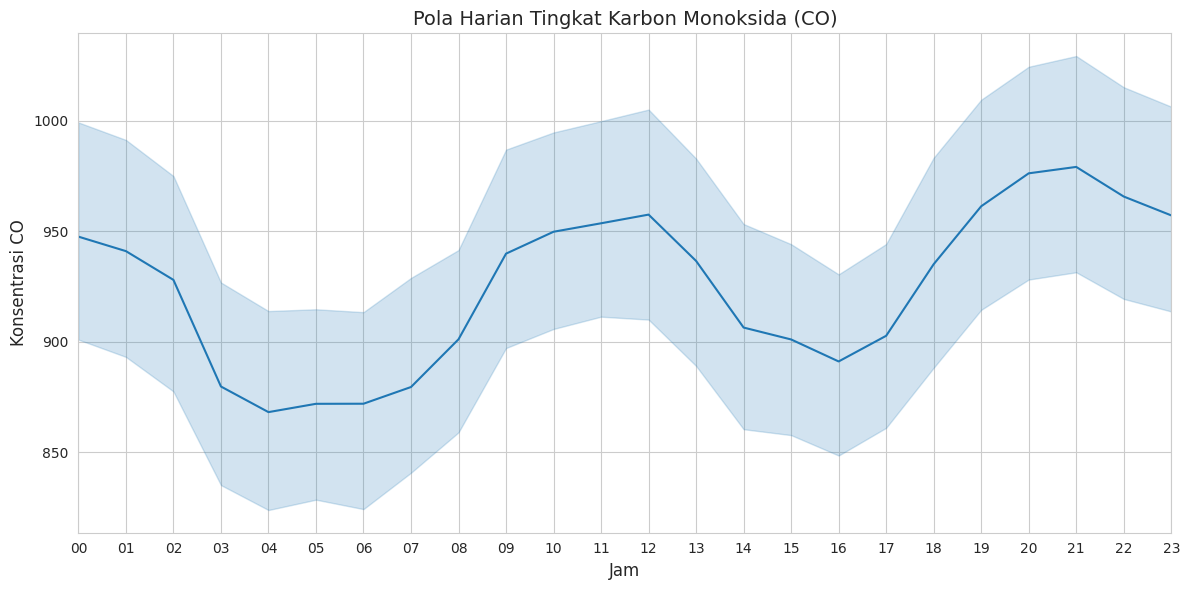

In [17]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.lineplot(data=df, x='hour', y='CO')
plt.title('Pola Harian Tingkat Karbon Monoksida (CO)', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Konsentrasi CO', fontsize=12)
plt.xlim(0, 23)
plt.annotate('Puncak', xy=(df['CO'].idxmax(), df['CO'].max()),
             xytext=(10, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

Pertanyaan 2:

Bagaimana hubungan antara TEMP (temperatur) dan tingkat PM2.5/PM10?

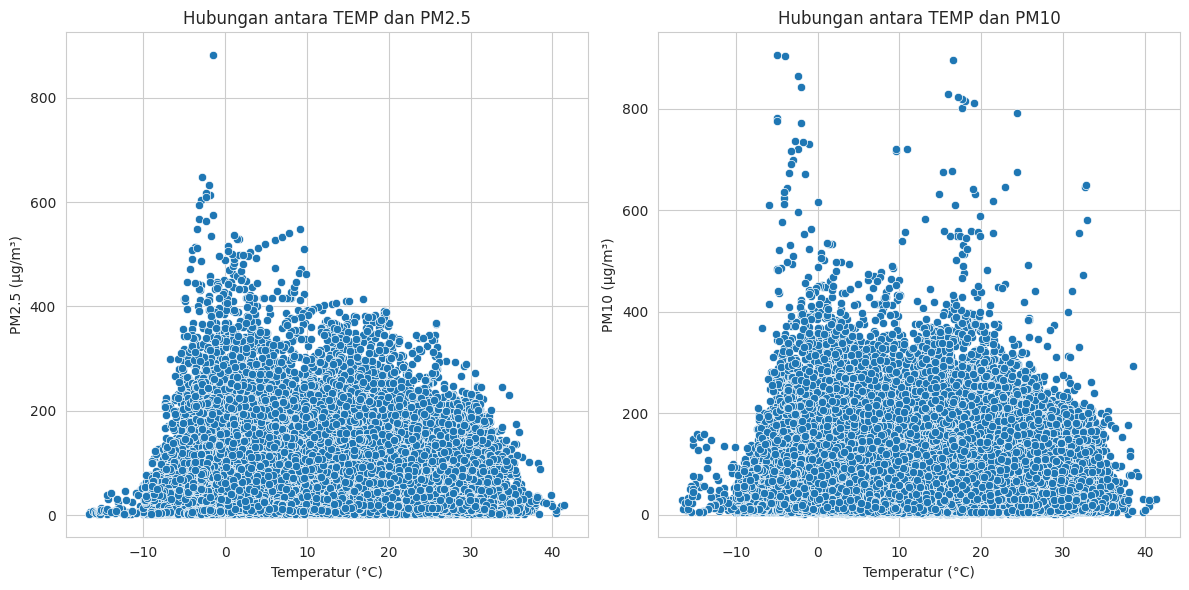

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='TEMP', y='PM2.5', data=df)
plt.title('Hubungan antara TEMP dan PM2.5')
plt.xlabel('Temperatur (°C)')
plt.ylabel('PM2.5 (µg/m³)')
plt.subplot(1, 2, 2)
sns.scatterplot(x='TEMP', y='PM10', data=df)
plt.title('Hubungan antara TEMP dan PM10')
plt.xlabel('Temperatur (°C)')
plt.ylabel('PM10 (µg/m³)')

plt.tight_layout()
plt.show()

Pertanyaan 3:

Bagaimana tren kualitas udara (PM2.5, PM10, SO2, CO, O3) berubah selama musim-musim berbeda dalam setahun? Apakah ada pola musiman yang dapat diidentifikasi?

<ipython-input-19-74632e4a829d>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_avg = df.groupby(['date', 'season'])[['PM2.5', 'PM10', 'SO2', 'CO', 'O3']].mean().reset_index()


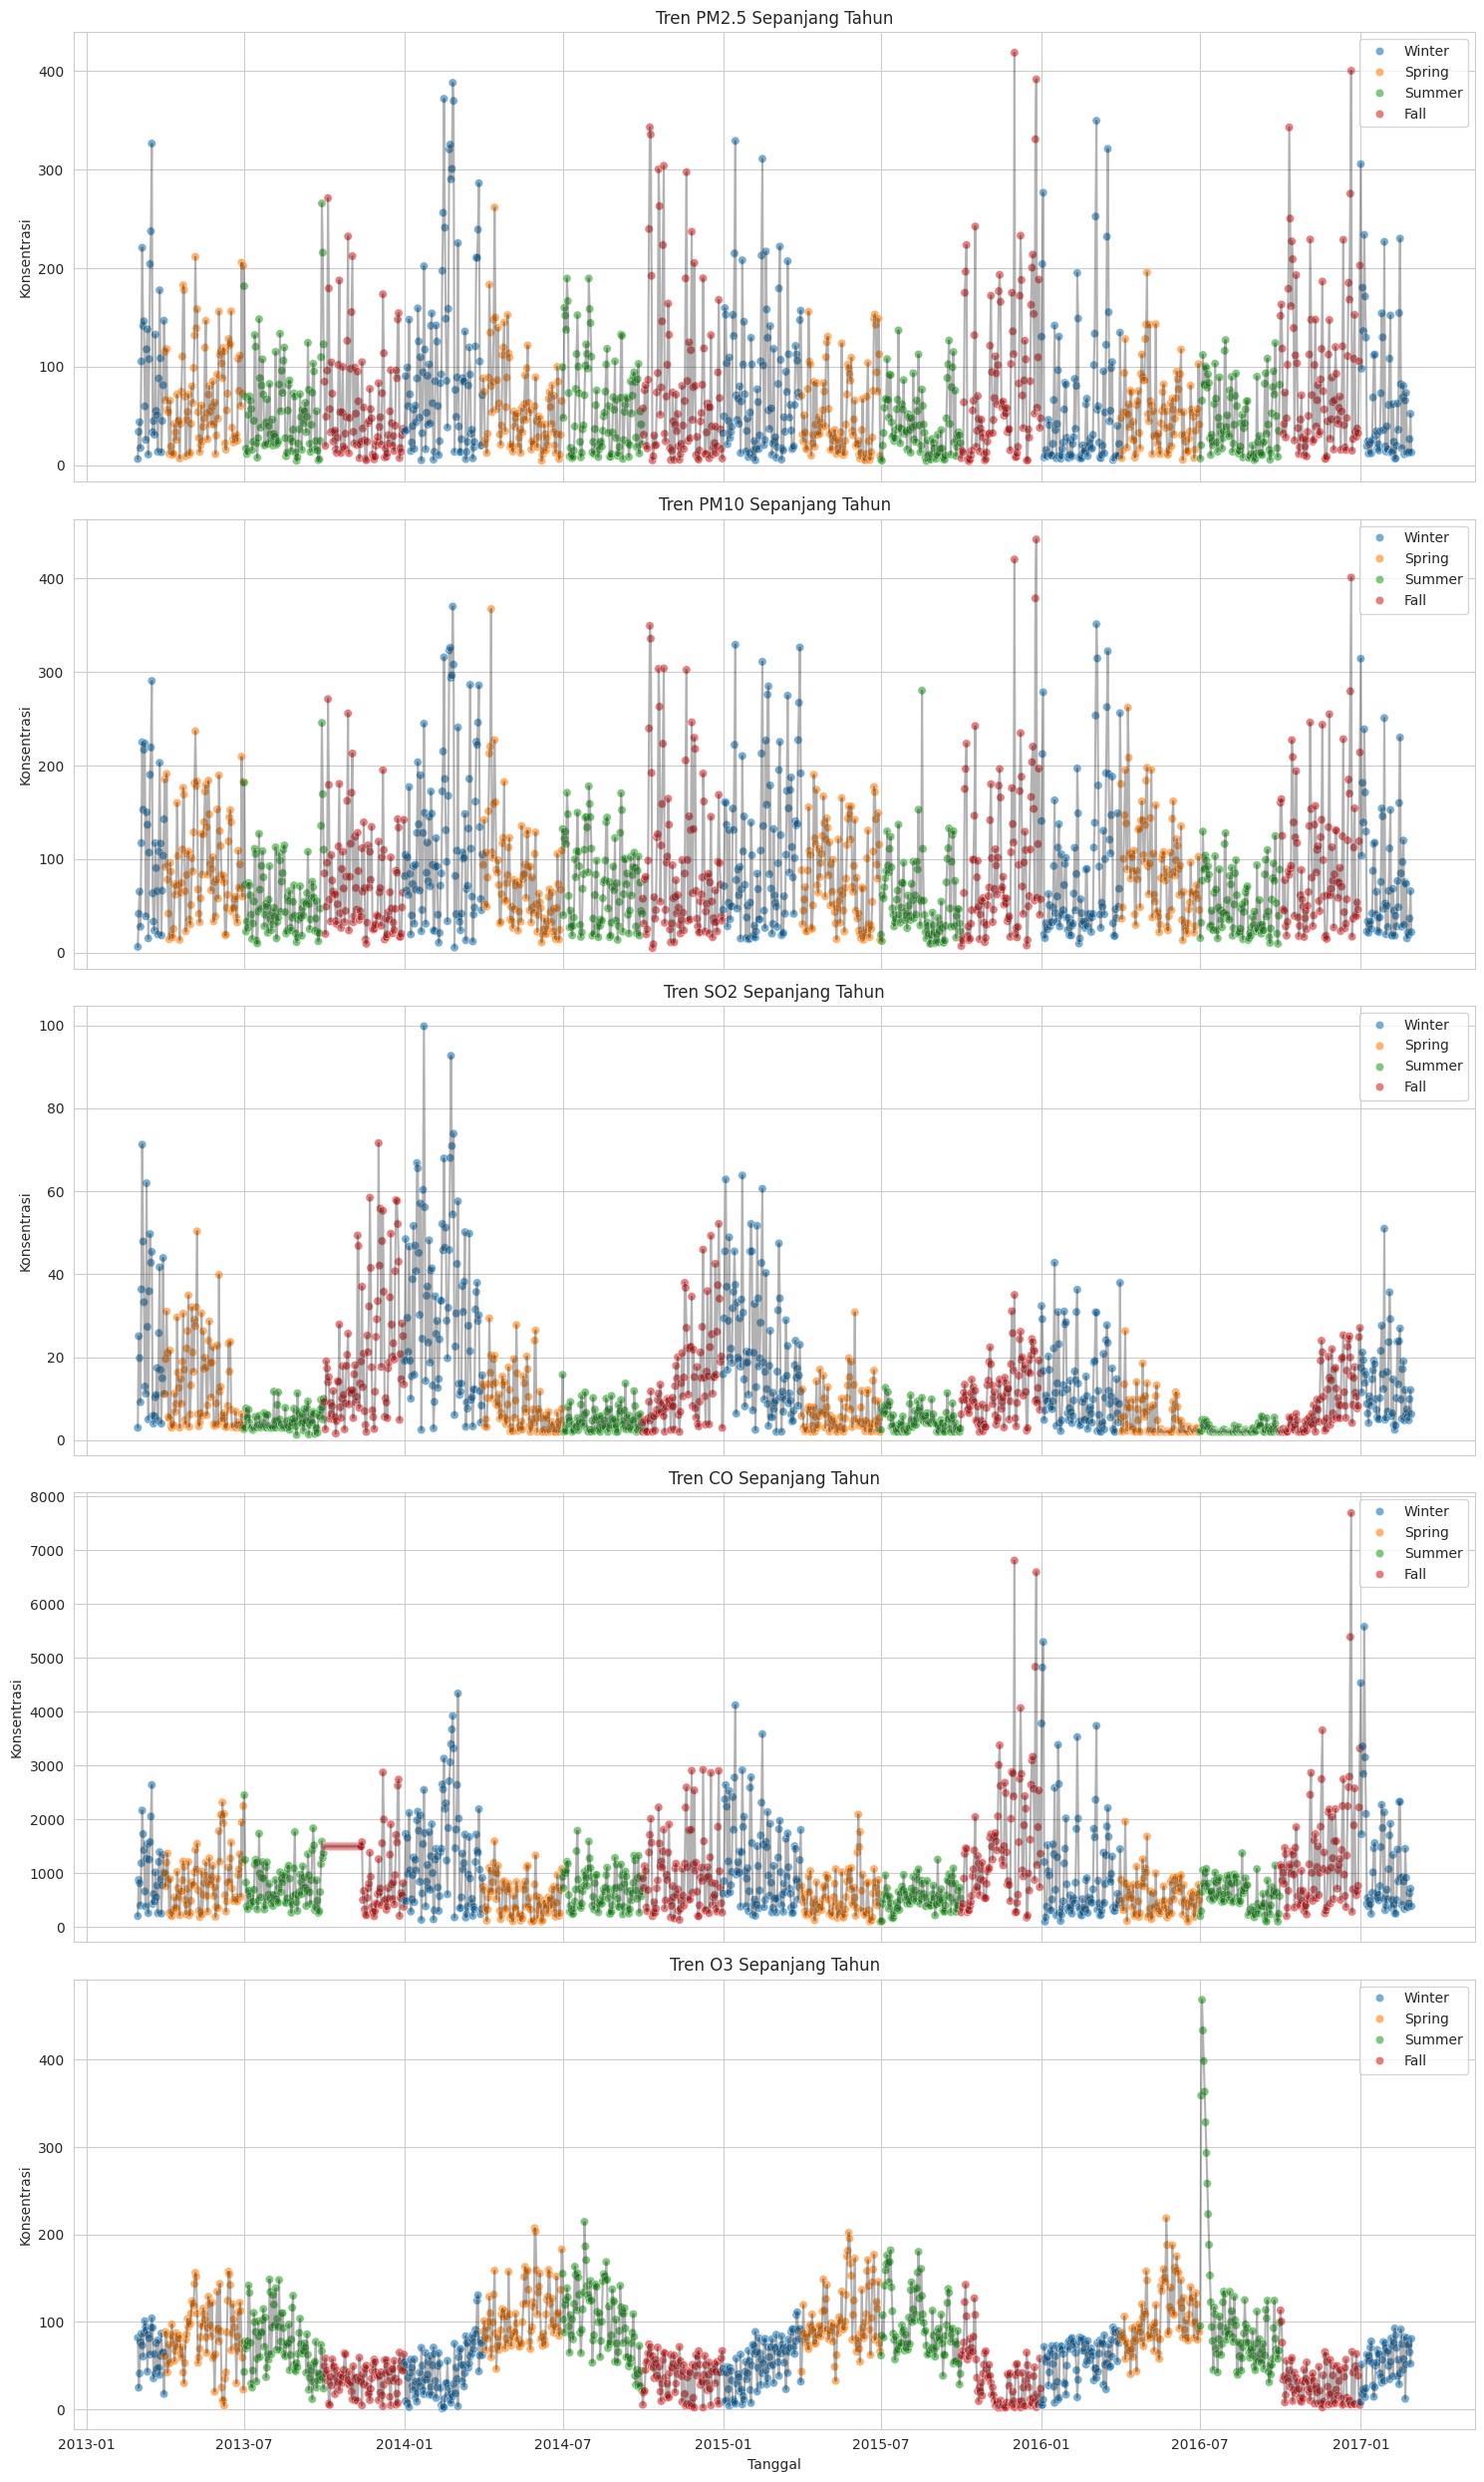

In [19]:
df['season'] = pd.cut(df['datetime'].dt.month,
                      bins=[0, 3, 6, 9, 12],
                      labels=['Winter', 'Spring', 'Summer', 'Fall'],
                      include_lowest=True)


daily_avg = df.groupby(['date', 'season'])[['PM2.5', 'PM10', 'SO2', 'CO', 'O3']].mean().reset_index()

fig, axes = plt.subplots(5, 1, figsize=(15, 25), sharex=True)
pollutants = ['PM2.5', 'PM10', 'SO2', 'CO', 'O3']

for i, pollutant in enumerate(pollutants):
    sns.scatterplot(data=daily_avg, x='date', y=pollutant, hue='season', ax=axes[i], alpha=0.6)
    sns.lineplot(data=daily_avg, x='date', y=pollutant, ax=axes[i], color='black', alpha=0.3)
    axes[i].set_title(f'Tren {pollutant} Sepanjang Tahun')
    axes[i].set_ylabel('Konsentrasi')
    if i < 4:
        axes[i].set_xlabel('')

plt.xlabel('Tanggal')
plt.tight_layout()
plt.show()

Insight:

Pertanyaan 1:
- Puncak pagi: Terjadi sekitar pukul 09:00-12:00, dengan konsentrasi CO tertinggi sekitar pukul 12:00.
- Puncak malam: Terjadi sekitar pukul 20:00-23:00, dengan konsentrasi CO tertinggi sekitar pukul 21:00.
- Konsentrasi CO terendah terjadi pada dini hari, sekitar pukul 04:00-06:00.
- Terjadi peningkatan tajam konsentrasi CO dari pukul 06:00 hingga 09:00.
- Penurunan signifikan terjadi setelah puncak siang, dari pukul 12:00 hingga 16:00.
- Peningkatan kembali mulai terjadi dari pukul 16:00 hingga mencapai puncak malam.

Pertanyaan 2:
- Distribusi partikel:
Untuk PM2.5 dan PM10, konsentrasi tertinggi cenderung terjadi pada rentang suhu 0°C hingga 20°C.
Konsentrasi partikel menurun secara signifikan pada suhu yang lebih tinggi (>30°C) dan lebih rendah (<0°C).
- Perbedaan pola PM2.5 dan PM10:
PM2.5 menunjukkan penurunan yang lebih jelas seiring kenaikan suhu dibanding PM10.
PM10 memiliki sebaran yang lebih luas pada suhu tinggi dibandingkan PM2.5.

Pertanyan 3:
- PM2.5 dan PM10:
Konsentrasi tertinggi terlihat pada musim dingin (Winter) dan musim gugur (Fall).
Puncak konsentrasi sering terjadi di awal tahun (Januari-Februari) dan akhir tahun (November-Desember).
Musim panas (Summer) umumnya menunjukkan konsentrasi terendah.
Pola ini konsisten dari tahun ke tahun, menunjukkan siklus musiman yang jelas.
- SO2:
Konsentrasi SO2 juga cenderung lebih tinggi pada musim dingin dan gugur.
Puncak konsentrasi terlihat lebih sering dan lebih tinggi di musim dingin.
Musim panas menunjukkan konsentrasi SO2 yang relatif rendah dan stabil.
- CO:
Pola musiman CO mirip dengan PM2.5 dan PM10, dengan konsentrasi tertinggi di musim dingin dan gugur.
Puncak ekstrem terlihat lebih sering terjadi di musim dingin.
Musim panas menunjukkan konsentrasi CO yang lebih rendah dan stabil.
- O3:
Berbeda dengan polutan lainnya, O3 menunjukkan pola yang berlawanan.
Konsentrasi O3 tertinggi terlihat pada musim panas dan musim semi (Spring).
Musim dingin konsisten menunjukkan konsentrasi O3 terendah.
Pola ini sangat jelas dan berulang setiap tahun.
- Tren Antar Tahun:
Terlihat adanya fluktuasi dari tahun ke tahun, namun pola musiman tetap konsisten.
Beberapa tahun menunjukkan puncak konsentrasi yang lebih tinggi untuk semua polutan, yang mungkin disebabkan oleh faktor-faktor khusus (misalnya, kondisi cuaca ekstrem atau peristiwa tertentu).

**Conclusion**

Pertanyaan 1 (Pola harian konsentrasi CO):
Kesimpulan: Konsentrasi CO menunjukkan pola harian yang jelas dengan dua puncak utama, yaitu pada pagi dan malam hari. Pola ini sangat mungkin berkaitan dengan aktivitas manusia, terutama lalu lintas kendaraan bermotor. Puncak pagi bertepatan dengan jam sibuk pagi, sementara puncak malam berkaitan dengan perjalanan pulang kerja dan aktivitas malam. Periode dini hari dengan konsentrasi terendah mencerminkan minimnya aktivitas manusia pada waktu tersebut. Pemahaman pola ini penting untuk manajemen lalu lintas, perencanaan kebijakan pengurangan emisi, dan penyusunan peringatan kesehatan masyarakat.

Pertanyaan 2 (Hubungan suhu dengan PM2.5 dan PM10):
Kesimpulan: Terdapat korelasi yang jelas antara suhu udara dan konsentrasi partikel PM2.5 dan PM10. Konsentrasi tertinggi cenderung terjadi pada suhu moderat, sementara suhu ekstrem (sangat rendah atau sangat tinggi) berkaitan dengan konsentrasi yang lebih rendah. Perbedaan pola antara PM2.5 dan PM10 menunjukkan bahwa faktor-faktor yang mempengaruhi kedua jenis partikel ini tidak sepenuhnya sama. Informasi ini berharga untuk pemodelan kualitas udara, perencanaan mitigasi polusi, dan pengembangan strategi adaptasi terhadap perubahan iklim yang dapat mempengaruhi distribusi suhu dan konsekuensinya terhadap kualitas udara.

Pertanyaan 3 (Tren musiman kualitas udara):
Kesimpulan: Tren kualitas udara menunjukkan pola musiman yang kuat dan konsisten untuk semua polutan yang dianalisis. PM2.5, PM10, SO2, dan CO memiliki konsentrasi tertinggi pada musim dingin dan gugur, sementara O3 menunjukkan pola yang berlawanan dengan konsentrasi tertinggi di musim panas dan semi. Pola ini kemungkinan besar dipengaruhi oleh faktor-faktor seperti kondisi meteorologi, pola penggunaan energi musiman, dan reaksi kimia atmosfer yang bergantung pada suhu dan radiasi matahari. Konsistensi pola ini dari tahun ke tahun memungkinkan perencanaan jangka panjang untuk pengelolaan kualitas udara, termasuk penyesuaian kebijakan dan tindakan pencegahan berdasarkan musim. Pemahaman ini juga penting untuk sektor-sektor seperti kesehatan, energi, transportasi, dan pariwisata dalam mengantisipasi dan mengatasi dampak variasi kualitas udara musiman.